In [23]:
import pyscf
from pyscf.tools import cubegen
import matplotlib.pyplot as plt
import numpy as np

mol = pyscf.gto.M(
    atom="H 0. 0. 0.; H 0. 0. 1.8", 
    basis='ccpvtz',
    )

mf = pyscf.scf.RHF(mol)
mf.kernel()

converged SCF energy = -0.953731559178948


-0.9537315591789485

In [24]:
mf.mo_energy

array([-0.40621319, -0.0148791 ,  0.38724176,  0.42132389,  0.68439787,
        0.68439787,  0.71305909,  0.87585733,  0.87585733,  1.21649626,
        2.42897499,  2.61750474,  3.23256739,  3.29908064,  3.29908064,
        3.41562145,  3.41562145,  3.44448313,  3.44448313,  3.55374574,
        3.55374574,  3.72748468,  3.82762094,  3.82762094,  3.95013574,
        3.95013574,  4.00812637,  4.54648904])

In [26]:
def plot_density(density):
    plt.figure(figsize=(8,8))
    range = np.max(np.abs(density))
    cm = plt.imshow(density[density.shape[0]//2,:,:], cmap='bwr',vmin=-range, vmax=range)
    plt.colorbar()


def plot_density_line(density):
    plt.figure(figsize=(8,8))
    cm = plt.plot(np.arange(density.shape[2]), density[density.shape[0]//2,density.shape[1]//2,:])
    

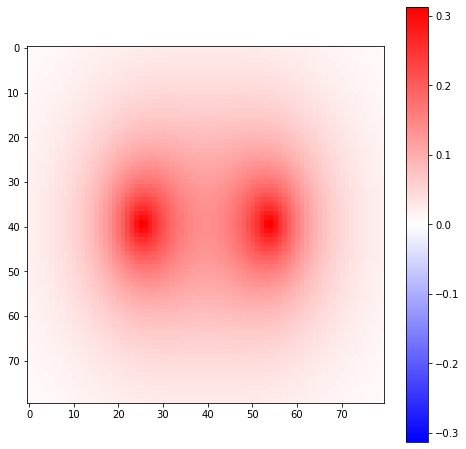

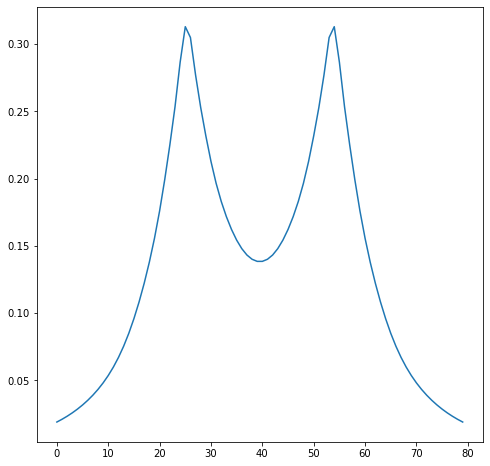

In [27]:
density = cubegen.orbital(mol, 'mo1.cube', mf.mo_coeff[:,0])
plot_density(density)
plot_density_line(density)

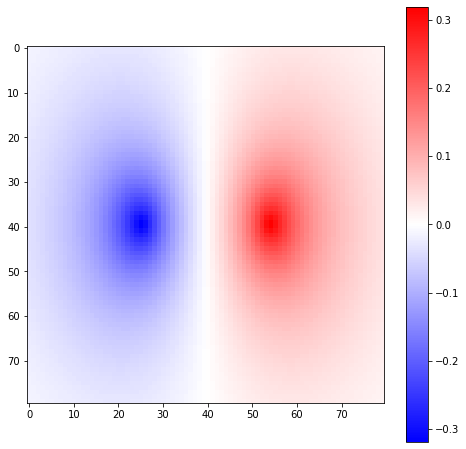

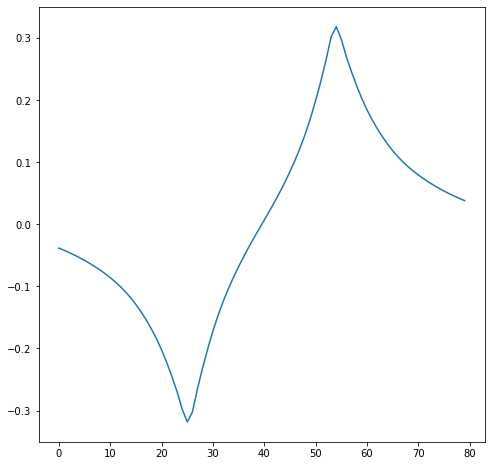

In [29]:
orbital = cubegen.orbital(mol, 'mo1.cube', mf.mo_coeff[:,1])
plot_density(orbital)
plot_density_line(orbital)

$$
H_{eff} = |\Phi_0\rangle \epsilon_0 \langle \Phi_0| + |\Phi_1\rangle \epsilon_1 \langle \Phi_1|
$$

This is equivalent to 
$$
H_{eff} = \begin{matrix}
\epsilon_0 & 0 \\
0 & \epsilon_1 \\
\end{matrix} 
$$

Written in the molecular orbital basis.

We eventually would like to write our effective Hamiltonian in a localized basis, which would correspond to 'sites.'

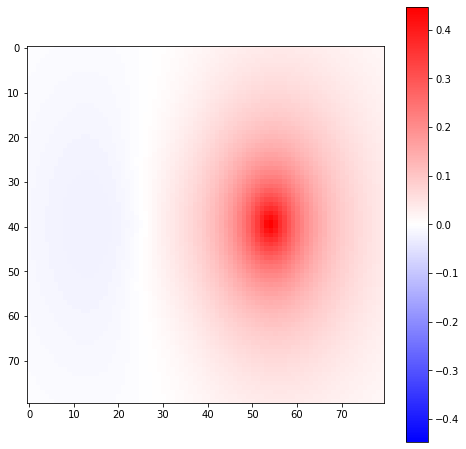

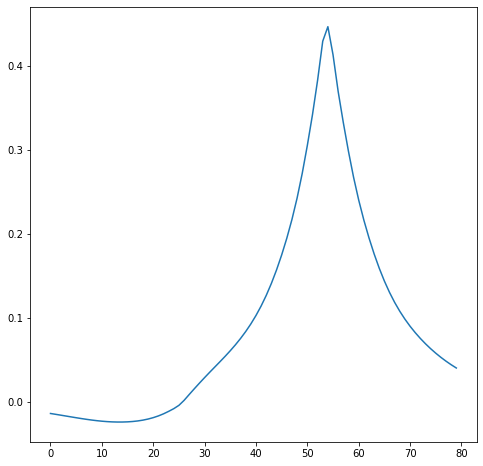

In [30]:
density = cubegen.orbital(mol, 'mo1.cube', (mf.mo_coeff[:,0]+mf.mo_coeff[:,1])/np.sqrt(2))
plot_density(density)
plot_density_line(density)

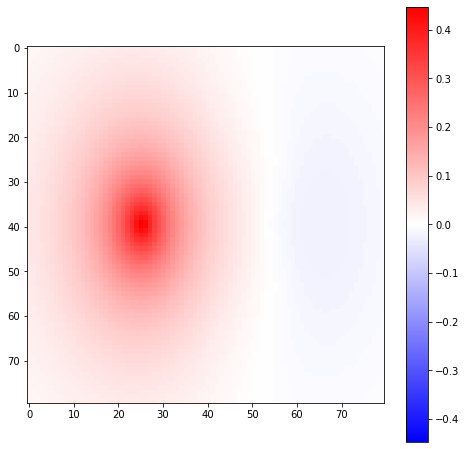

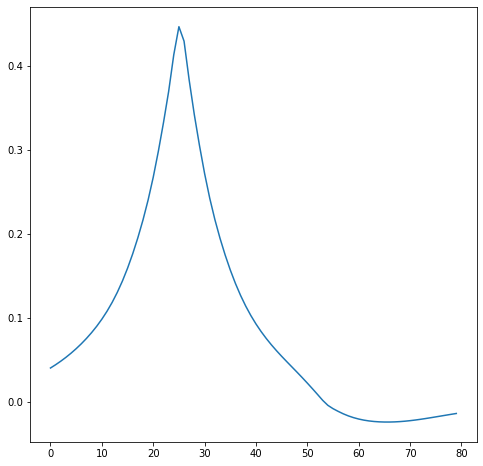

In [31]:
density = cubegen.orbital(mol, 'mo1.cube', (mf.mo_coeff[:,0]-mf.mo_coeff[:,1])/np.sqrt(2))
plot_density(density)
plot_density_line(density)

Now we have basis functions that at least approximately correspond to sites. 

Question: what is the Hamiltonian in the new basis? Rotation operator is:
$$
U = \frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1 \\
1 & -1 \\
\end{bmatrix} 
$$

$H$ in the new basis is 
$$
UHU^\dagger = \frac{1}{2} \begin{bmatrix}
1 & 1 \\
1 & -1 \\
\end{bmatrix} 
\begin{bmatrix}
\epsilon_0 & 0 \\
0 & \epsilon_1 \\
\end{bmatrix} 
\begin{bmatrix}
1 & 1 \\
1 & -1 \\
\end{bmatrix} 
$$


In [32]:
R = np.array([[1,1],[1,-1]])/np.sqrt(2)
H = np.array([[mf.mo_energy[0],0],[0,mf.mo_energy[1]]])
H_tb = np.einsum("ij,jk,kl->il", R,H,R)
print(H_tb*27.2114)

[[-5.72925531 -5.3243742 ]
 [-5.3243742  -5.72925531]]


In [33]:
w,v = np.linalg.eigh(H_tb)
print(w)
print(v)

[-0.40621319 -0.0148791 ]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
